Write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt). Assume a linear model: y = w0 + w1*x. You need to

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column), and use Python to implement the following methods to find the coefficients:

Plotting the `data2.txt` dataset

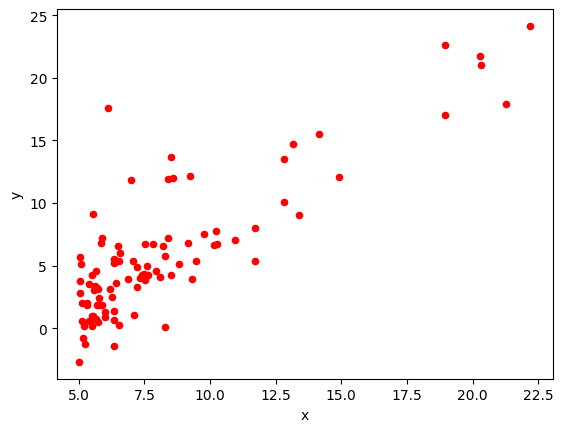

In [177]:
df= pd.read_csv("data2.txt",sep=",",header=None)
df.columns=['x','y']

df.plot(kind='scatter',x='x',y='y',color='red')
plt.show()

2) Normal equation, and

Using normal equation to find the co-efficient

In [178]:
x= df['x'].values
y= df['y'].values
lenx= len(x)
m_ones=np.ones((lenx,1))
x=np.reshape(x,(lenx,1))
x=np.append(m_ones,x,axis=1)                            # For making x0 as 1 for all instances
theta_best= np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print("The most optimal co-eficient value taken using normal equation ",theta_best)

The most optimal co-eficient value taken using normal equation  [-3.89578088  1.19303364]


Plotting graph using both normal equation and data points

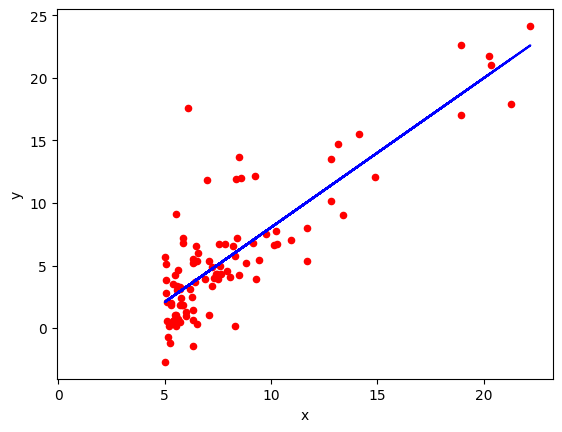

In [179]:
y_pred= theta_best[0]+(theta_best[1]*x)
df.plot(kind='scatter',x='x',y='y',color='red')
plt.plot(x,y_pred,'-',color='blue')
plt.show()

3) Gradient Descent using batch AND stochastic modes respectively:


a) Split dataset into 80% for training and 20% for testing.

In [180]:
m = len(df['x'].values)
x = np.reshape(df['x'].values,(m,1))
y = np.reshape(df['y'].values,(m,1))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

b) Plot MSE vs. iteration of each mode for both training set and testing set (i.e., batch –
training and testing; stochastic – training and testing). Compare batch and stochastic 
modes (with discussion) in terms of accuracy (of testing set) and speed of convergence
(You need to determine an appropriate termination condition, e.g., when cost function 
is less than a threshold, and/or after a given number of iterations.)

In [181]:
def cost_function(X,y,theta):
    cost= np.sum(np.square(((np.dot(X, theta)) - y))) /(2*len(X))
    return cost

In [182]:
def grad_decent(X,y,thetha,lr=0.01,iter1=1000):
    len2=len(y)
    cost_hist=np.zeros(iter1)
    thetha_hist=np.zeros((iter1,2))
    for i in range(iter1):
        thetha = thetha -lr*(1/len2)*( X.T.dot((np.dot(X,thetha)) - y))
        thetha_hist[i,:]=thetha.T
        cost_hist[i]=cost_function(X,y,thetha)
    return thetha,cost_hist,thetha_hist

In [183]:
eta=0.02
n_iterations =2000
theta= np.random.randn(2,1)
print(theta)
X_train = np.append((np.ones((len(X_train),1))),X_train,axis=1)
theta_final,cost_history,theta_history = grad_decent(X_train,y_train,theta,eta,n_iterations)
print(f'Final cost/MSE:  {cost_history[-1]:0.3f}')
print('-------------------------')
for it in range(n_iterations):
    print("Iterations: ",it," Cost Function Value: ",round(cost_history[it],3))

[[ 0.16243124]
 [-0.04818511]]
Final cost/MSE:  3.686
-------------------------
Iterations:  0  Cost Function Value:  16.095
Iterations:  1  Cost Function Value:  9.595
Iterations:  2  Cost Function Value:  7.167
Iterations:  3  Cost Function Value:  6.255
Iterations:  4  Cost Function Value:  5.906
Iterations:  5  Cost Function Value:  5.768
Iterations:  6  Cost Function Value:  5.708
Iterations:  7  Cost Function Value:  5.678
Iterations:  8  Cost Function Value:  5.658
Iterations:  9  Cost Function Value:  5.643
Iterations:  10  Cost Function Value:  5.629
Iterations:  11  Cost Function Value:  5.616
Iterations:  12  Cost Function Value:  5.603
Iterations:  13  Cost Function Value:  5.59
Iterations:  14  Cost Function Value:  5.577
Iterations:  15  Cost Function Value:  5.564
Iterations:  16  Cost Function Value:  5.552
Iterations:  17  Cost Function Value:  5.539
Iterations:  18  Cost Function Value:  5.527
Iterations:  19  Cost Function Value:  5.515
Iterations:  20  Cost Function

Plotting MSE vs Iteration of training data (Batch gradient descent)

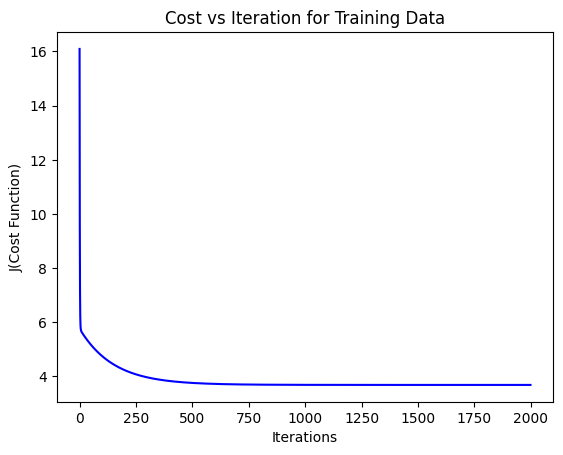

In [184]:
plt.plot(range(n_iterations),cost_history,'b-')
plt.title("Cost vs Iteration for Training Data")
plt.ylabel("J(Cost Function)")
plt.xlabel("Iterations") 
plt.show()

Computing the cost value and finding the theta using Batch Gradient decent for Test data

In [185]:
lr=0.02
n_iterations =2000
print("Theta:",theta)
X_test = np.append((np.ones((len(X_test),1))),X_test,axis=1)
theta_final,cost_history,theta_history = grad_decent(X_test,y_test,theta,lr,n_iterations)
print(f'Final cost/MSE:  {cost_history[-1]:0.3f}')
print('-------------------------')
for iter in range(n_iterations):
    print("Iterations: ",iter," Cost Function Value: ",round(cost_history[iter],3))

Theta: [[ 0.16243124]
 [-0.04818511]]
Final cost/MSE:  6.650
-------------------------
Iterations:  0  Cost Function Value:  25.321
Iterations:  1  Cost Function Value:  18.066
Iterations:  2  Cost Function Value:  13.688
Iterations:  3  Cost Function Value:  11.046
Iterations:  4  Cost Function Value:  9.45
Iterations:  5  Cost Function Value:  8.487
Iterations:  6  Cost Function Value:  7.904
Iterations:  7  Cost Function Value:  7.551
Iterations:  8  Cost Function Value:  7.337
Iterations:  9  Cost Function Value:  7.206
Iterations:  10  Cost Function Value:  7.126
Iterations:  11  Cost Function Value:  7.077
Iterations:  12  Cost Function Value:  7.046
Iterations:  13  Cost Function Value:  7.026
Iterations:  14  Cost Function Value:  7.012
Iterations:  15  Cost Function Value:  7.003
Iterations:  16  Cost Function Value:  6.996
Iterations:  17  Cost Function Value:  6.991
Iterations:  18  Cost Function Value:  6.986
Iterations:  19  Cost Function Value:  6.983
Iterations:  20  Cos

Plotting MSE vs Iteration of test data (Batch gradient descent)

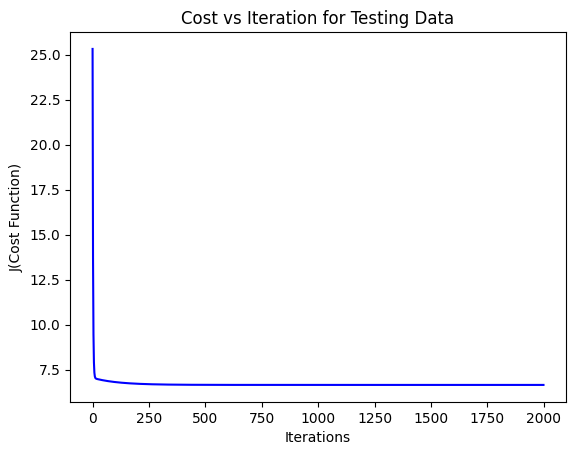

In [186]:
plt.plot(range(n_iterations),cost_history,'b-')
plt.title("Cost vs Iteration for Testing Data")
plt.ylabel("J(Cost Function)")
plt.xlabel("Iterations") 
plt.show()

In [187]:
m = len(df['x'].values)
x = np.reshape(df['x'].values,(m,1))
y = np.reshape(df['y'].values,(m,1))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
t0,t1=5,50

Method to calculate Learning rate in a decreasing way and calculating the cost vs iteration plot for training data. 

Implemented 2 approaches for the training data using 2 methods which finds the learning rate.

1. Approach 1st: Learning rate is continuously decreasing as the number of iterations increases
2. Approach 2nd: Setting a constant learning Rate

Approach 1st

In [188]:
def learning_schedule(t):
    return t0 / (t + t1)

In [189]:
def stocashtic_grad_decent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_hist = np.zeros(iterations) 
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            eta= learning_schedule(iterations * m + i)
            theta = theta -(1/m)*eta*( X_i.T.dot((np.dot(X_i,theta) - y_i)))
            cost += cost_function(X_i,y_i,theta)
        cost_hist[it]  = cost
        
    return theta, cost_hist

In [190]:
lr =0.01
n_iter = 400
theta = np.random.randn(2,1)
X_b = np.append(np.ones((len(X_train),1)),X_train,axis=1)
theta,cost_history = stocashtic_grad_decent(X_b,y_train,theta,lr,n_iter)
print(f'Final cost/MSE:  {cost_history[-1]:0.3f}')
print('-------------------------')
for i in range(n_iter):
    print("Iterations: ",i," Cost Function Value: ",round(cost_history[i],3))

Final cost/MSE:  503.638
-------------------------
Iterations:  0  Cost Function Value:  1282.391
Iterations:  1  Cost Function Value:  954.885
Iterations:  2  Cost Function Value:  1271.578
Iterations:  3  Cost Function Value:  1703.47
Iterations:  4  Cost Function Value:  1006.23
Iterations:  5  Cost Function Value:  1242.325
Iterations:  6  Cost Function Value:  869.621
Iterations:  7  Cost Function Value:  991.4
Iterations:  8  Cost Function Value:  1187.987
Iterations:  9  Cost Function Value:  925.266
Iterations:  10  Cost Function Value:  734.56
Iterations:  11  Cost Function Value:  1329.575
Iterations:  12  Cost Function Value:  1283.637
Iterations:  13  Cost Function Value:  1113.845
Iterations:  14  Cost Function Value:  1190.981
Iterations:  15  Cost Function Value:  1052.6
Iterations:  16  Cost Function Value:  786.326
Iterations:  17  Cost Function Value:  1041.917
Iterations:  18  Cost Function Value:  1326.209
Iterations:  19  Cost Function Value:  757.41
Iterations:  2

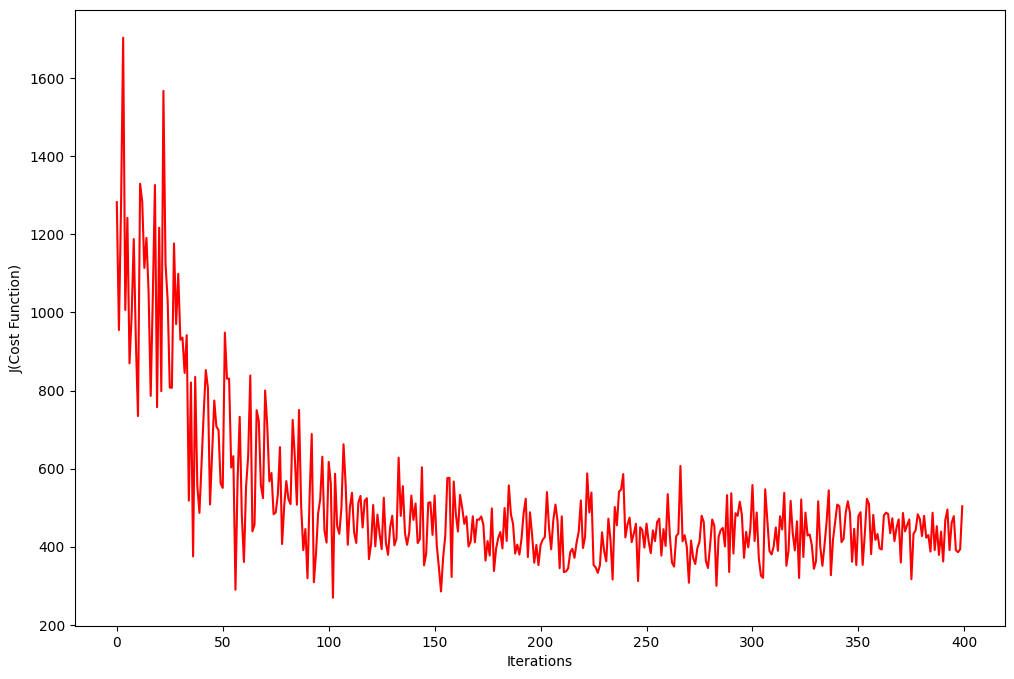

In [191]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Cost Function)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r-')

Method to calculate the cost vs iteration plot for training data using constant learning rate(Stocastic Gradient Decent)

Approach 2nd

In [192]:
def stocashtic_grad_decent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_hist = np.zeros(iterations) 
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((np.dot(X_i,theta) - y_i)))
            cost += cost_function(X_i,y_i,theta)
        cost_hist[it]  = cost
        
    return theta, cost_hist


In [193]:
lr =0.01
n_iter = 400
theta = np.random.randn(2,1)
X_b = np.append(np.ones((len(X_train),1)),X_train,axis=1)
theta,cost_history = stocashtic_grad_decent(X_b,y_train,theta,lr,n_iter)
print(f'Final cost/MSE:  {cost_history[-1]:0.3f}')
print('-------------------------')
for i in range(n_iter):
    print("Iterations: ",i," Cost Function Value: ",round(cost_history[i],3))

Final cost/MSE:  212.522
-------------------------
Iterations:  0  Cost Function Value:  9218.621
Iterations:  1  Cost Function Value:  1967.617
Iterations:  2  Cost Function Value:  594.778
Iterations:  3  Cost Function Value:  535.901
Iterations:  4  Cost Function Value:  269.294
Iterations:  5  Cost Function Value:  459.981
Iterations:  6  Cost Function Value:  410.21
Iterations:  7  Cost Function Value:  448.475
Iterations:  8  Cost Function Value:  446.535
Iterations:  9  Cost Function Value:  372.638
Iterations:  10  Cost Function Value:  343.773
Iterations:  11  Cost Function Value:  380.234
Iterations:  12  Cost Function Value:  403.606
Iterations:  13  Cost Function Value:  445.497
Iterations:  14  Cost Function Value:  321.219
Iterations:  15  Cost Function Value:  336.389
Iterations:  16  Cost Function Value:  396.349
Iterations:  17  Cost Function Value:  350.855
Iterations:  18  Cost Function Value:  391.604
Iterations:  19  Cost Function Value:  436.466
Iterations:  20  C

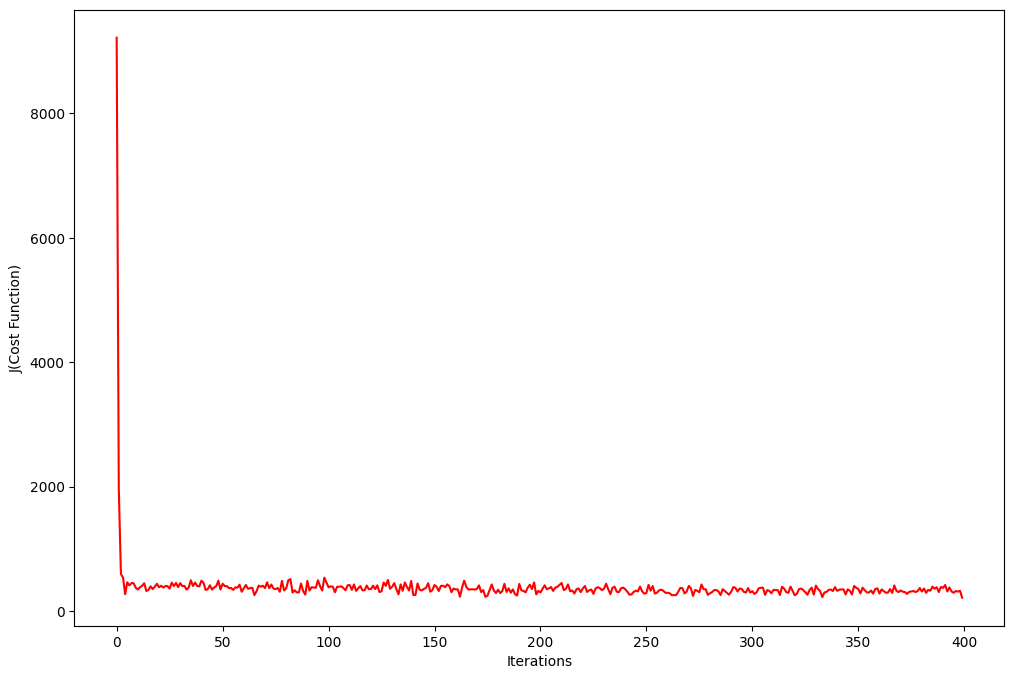

In [194]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Cost Function)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r-')

Method to calculate the cost vs iteration plot for Test data using constant learning rate(Stocastic Gradient Decent)

In [195]:
lr =0.01
n_iter = 400
theta = np.random.randn(2,1)
X_b = np.append(np.ones((len(X_test),1)),X_test,axis=1)
theta,cost_history = stocashtic_grad_decent(X_b,y_test,theta,lr,n_iter)
print(f'Theta0:          {theta_final[0][0]:.3f},\nTheta1:          {theta_final[1][0]:0.3f}')
print(f'Final cost/MSE:  {cost_history[-1]:0.3f}')
print('-------------------------')
for i in range(n_iter):
    print("Iterations: ",i," Cost Function Value: ",round(cost_history[i],3))

Theta0:          -1.624,
Theta1:          0.949
Final cost/MSE:  50.218
-------------------------
Iterations:  0  Cost Function Value:  213.784
Iterations:  1  Cost Function Value:  43.437
Iterations:  2  Cost Function Value:  195.645
Iterations:  3  Cost Function Value:  143.102
Iterations:  4  Cost Function Value:  262.703
Iterations:  5  Cost Function Value:  150.729
Iterations:  6  Cost Function Value:  45.124
Iterations:  7  Cost Function Value:  76.589
Iterations:  8  Cost Function Value:  128.212
Iterations:  9  Cost Function Value:  46.707
Iterations:  10  Cost Function Value:  71.254
Iterations:  11  Cost Function Value:  155.788
Iterations:  12  Cost Function Value:  150.552
Iterations:  13  Cost Function Value:  165.686
Iterations:  14  Cost Function Value:  226.132
Iterations:  15  Cost Function Value:  50.359
Iterations:  16  Cost Function Value:  142.873
Iterations:  17  Cost Function Value:  59.832
Iterations:  18  Cost Function Value:  63.552
Iterations:  19  Cost Funct

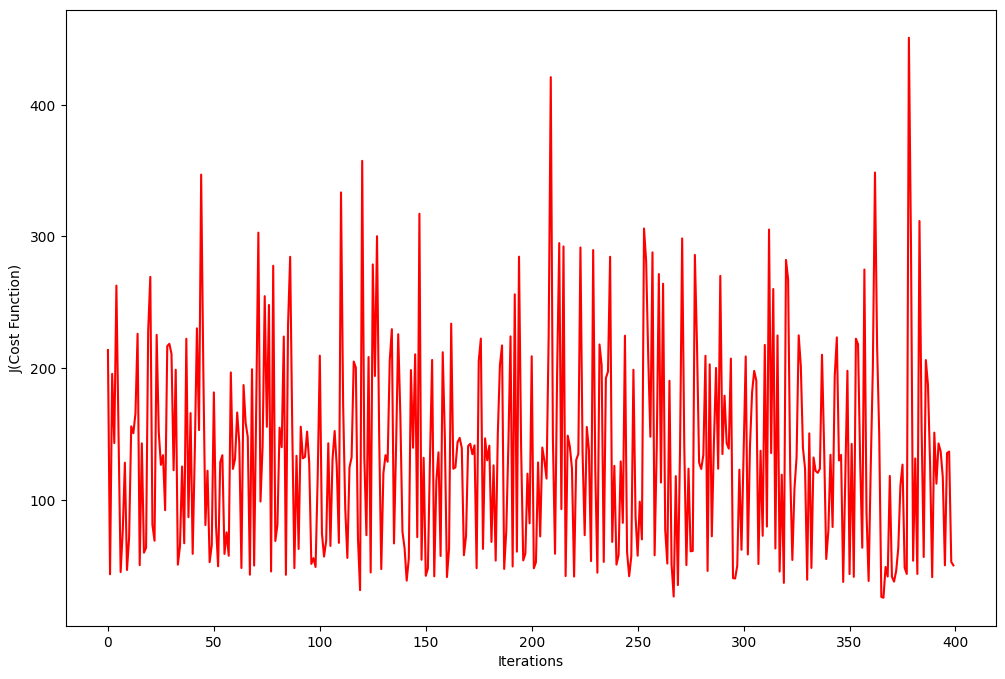

In [196]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Cost Function)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r-')

# Comparison of batch and stochastic modes in terms of their accuracy and speed of convergence  

Normal equations performance is worst in terms of accuracy and speed of convergence.

Batch Gradient Decent shows higher accuracy and speed of convergence in comparision to Stocastic Gradient Decent for our data(`data2.text`). 

Although, Stotastic is less likely to have local minima but it will take less amount of time to generate an output as we can see from the above generated graph where Batch Gradient Decent converges after around 1000 iteration while Stocastic Gradient decent converges around the minimum in just 10-20 iteration. The reason that Stocastic Gradeint decent will never reach the Minimum because of the convergence is higher than Batch decent. 

# Determine an appropriate termination condition (e.g., when cost function is less than a threshold, and/or after a given number of iterations)

We have taken number of iterations over threshold as our given data starts converging to the minimum after few hundred iterations which doesn't require the use of a threshold to terminate for our data (`data2.txt`) 

In [197]:
m = len(df['x'].values)
x = np.reshape(df['x'].values,(m,1))
y = np.reshape(df['y'].values,(m,1))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

c) Plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 
0.006, 0.007, 0.008, 0.009, 0.01) and determine the best learning rate

For Batch

Cost Function for LR  0.001 :  4.647
Cost Function for LR  0.002 :  4.104
Cost Function for LR  0.003 :  3.822
Cost Function for LR  0.004 :  3.852
Cost Function for LR  0.005 :  3.716
Cost Function for LR  0.006 :  3.721
Cost Function for LR  0.007 :  3.7
Cost Function for LR  0.008 :  3.696
Cost Function for LR  0.009 :  3.689
Cost Function for LR  0.01 :  3.688


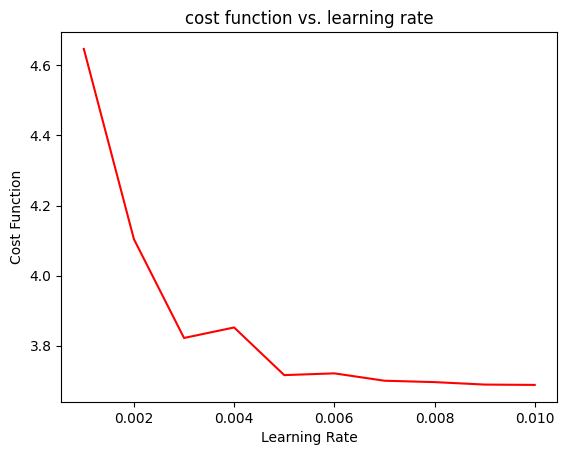

In [198]:
lr_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cost_function_listB = []
for i in lr_list:
    lr =i
    n_iter = 2000
    theta = np.random.randn(2,1)
    X_b = np.append(np.ones((len(X_train),1)),X_train,axis=1)
    theta,cost_history,theta_history = grad_decent(X_b,y_train,theta,lr,n_iter)
    cost_function_listB.append(round(cost_history[n_iter-1],3))
    print('Cost Function for LR ',lr,': ',round(cost_history[n_iter-1],3))
plt.plot(lr_list,cost_function_listB,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.title('cost function vs. learning rate')
plt.show()

For Stocastic

Cost Function for LR  0.001 :  388.888
Cost Function for LR  0.002 :  471.057
Cost Function for LR  0.003 :  479.517
Cost Function for LR  0.004 :  384.964
Cost Function for LR  0.005 :  543.107
Cost Function for LR  0.006 :  305.823
Cost Function for LR  0.007 :  358.281
Cost Function for LR  0.008 :  336.55
Cost Function for LR  0.009 :  320.348
Cost Function for LR  0.01 :  319.176


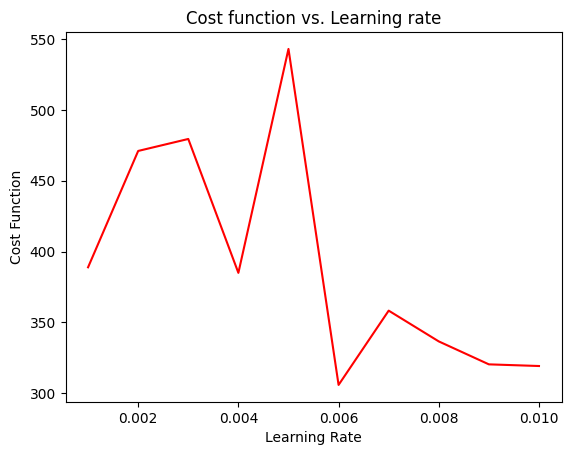

In [199]:
lr_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cost_function_listS = []
for i in lr_list:
    lr =i
    n_iter = 400
    theta = np.random.randn(2,1)
    X_b = np.append(np.ones((len(X_train),1)),X_train,axis=1)
    theta,cost_history = stocashtic_grad_decent(X_b,y_train,theta,lr,n_iter)
    cost_function_listS.append(round(cost_history[n_iter-1],3))
    print('Cost Function for LR ',lr,': ',round(cost_history[n_iter-1],3))
plt.plot(lr_list,cost_function_listS,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.title('Cost function vs. Learning rate')
plt.show()

# From the above two generated graph of cost vs learning rate for Batch and Stocastic, we can infer as follows: 

For both methods of evaluating the cost function, very low learning rate also leads to high cost function which means the number of iterations that we took was not enough to reach the minimum of the descent. But when iteration are in the range of 2000, a learning rate of 0.007-0.01 is ideal for our data set(`data2.txt`). 